## Desarrollo de una cámara de condicionamiento operante con interfaz gráfica

### Análisis de dos artículos

Se analizaron los artículos de Gurley y de O'Leary con las siguientes conclusiones

 Autor| Pros | Cons
 -- | -- | --
**O'Leary** | Mayor uso de periféricos (sensor de movimiento y LED)|  Procedimientos poco claros
 |Incorporación de RPi3b y Arduino | Código no disponible
 |Uso de pygame|
**Gurley** | Mucho código disponible | Uso de kivy 
 |Procedimientos explícitos | Únicamente motor y buzzer
 |Archivo de diseño para el dispensador |


### Materiales y precios

Nota: estos precios están calculados en pesos mexicanos

Material | Precio
-- | --
Arduino UNO R3 | 150
Buzzer |  12
Servomotor SG 90 | 50
Sensor KY032 | 25
Raspberry Pi 3 B | 970 
Disipador de calor | 30
Pantalla XPT2046 | 540
Caja de acrílico | reciclada
Dispensador | reciclado
**Total** | 1777

### Requerimientos de RPi
- Una tarjeta micro SD de al menos 8 GB de capacidad para instalar el sistema operativo Raspberry Pi OS
- Un teclado de computadora (puede ser Bluetooth o USB)
- Un ratón de computadora
- Cable HDMI
- Monitor HDMI
- Una fuente de alimentación micro USB con salida de 5 V (funciona excelente un cargador de teléfono con cable)


Nota: no se incluye el costo de estos, pues son elementos que probablemente el estudiante tenga a la mano

### ¿Cómo instalar Raspberry Pi OS?

Hasta mayo de 2020 se llamaba Raspbian.

1. Ir a https://www.raspberrypi.org/downloads/raspberry-pi-os/ 
2. En este proyecto se usó la versión de escritorio
3. Descargar Balena en https://www.balena.io/etcher/. Está disponible para Linux, MacOS y Windows.
4. Ver la guía disponible en: https://www.raspberrypi.org/forums/viewtopic.php?t=279692 Para obtener una imagen de disco en la tarjeta micro SD


### ¿En qué se basó la elección de los periféricos?

Estaban disponibles en el laboratorio, además pueden integrarse ya sea con arduino o raspberry pi por su rango de operación de voltaje. Son relativamente fáciles de conseguir y económicos.

### Características de los periféricos

* Buzzer
* Sensor KY 032
* Servomotor Raspberry Pi


### ¿Cómo se conectan los periféricos?
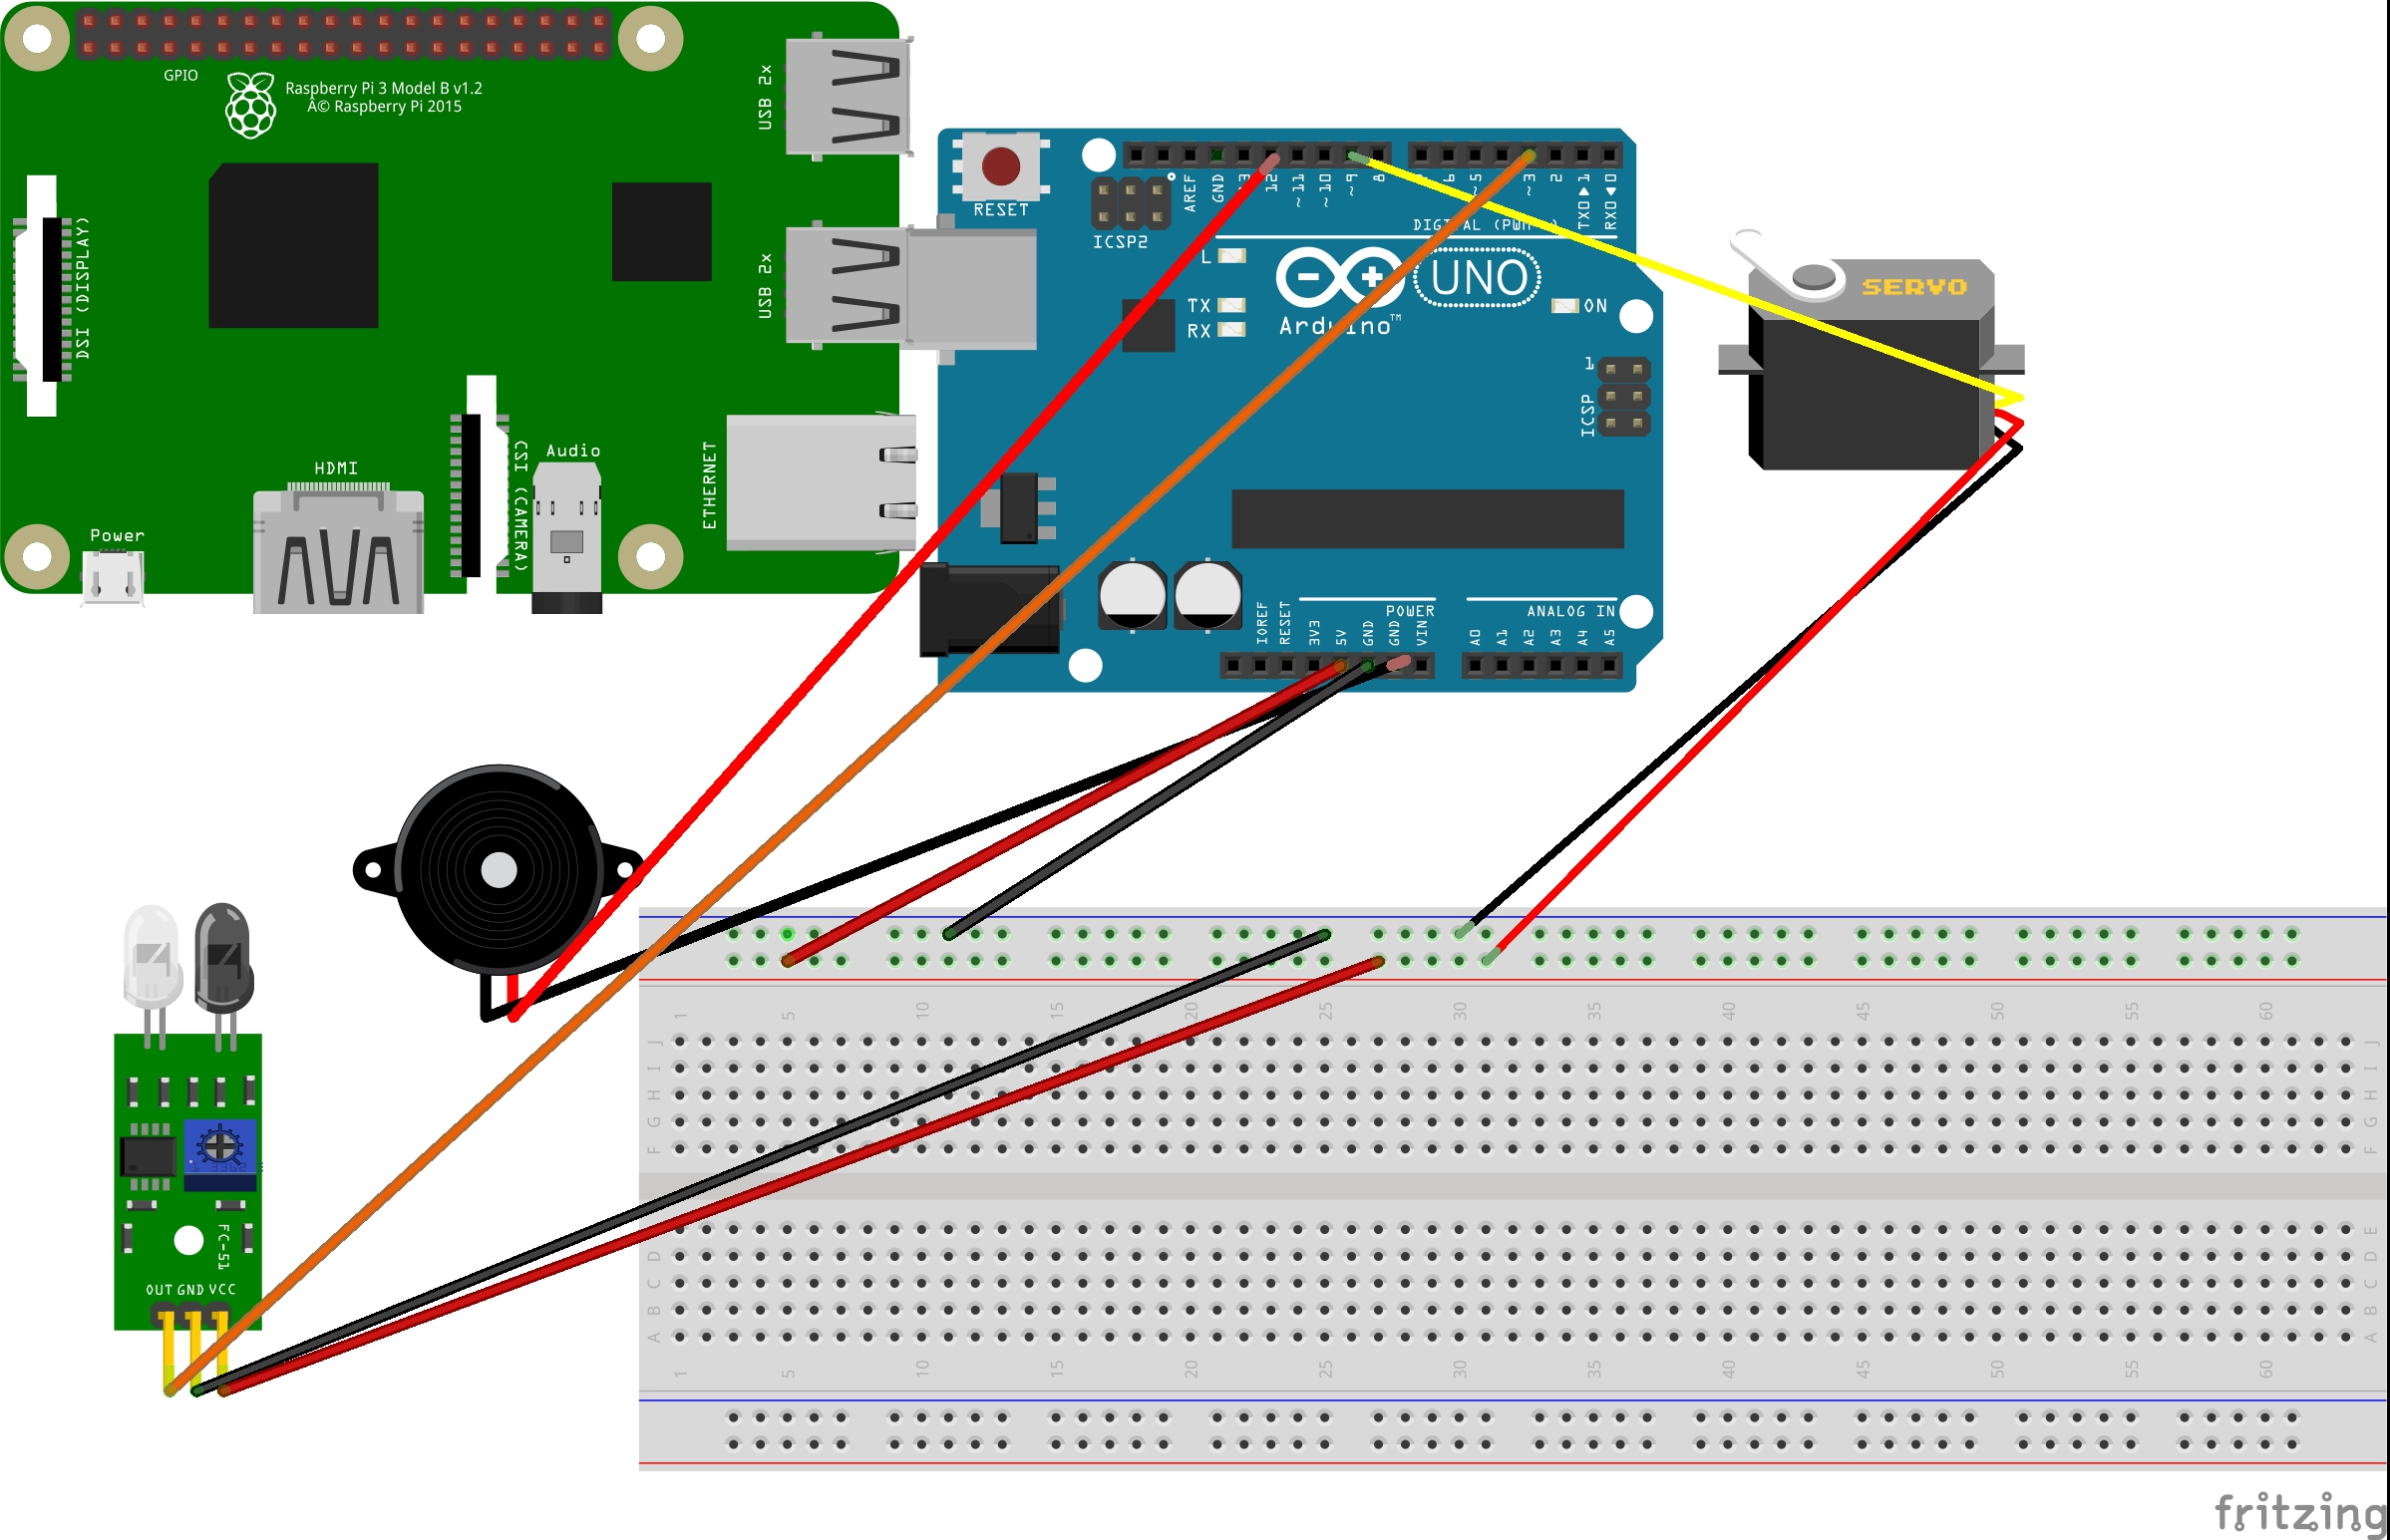

#### Diagrama de pantalla

Datasheet: https://ldm-systems.ru/f/doc/catalog/HY-TFT-2,8/XPT2046.pdf

https://forum.arduino.cc/index.php?topic=601129.0

#### ¿Cómo proyectar Raspbian a la pantalla?
Hay que escribir los siguientes comandos en la terminal
    sudo rm -rf LCD-show
    
    git clone https://github.com/goodtft/LCD-show.git
    
    chmod -R 755 LCD-show
    
    cd LCD-show/
    
    sudo ./LCD35-show

Después de correr el código hay que reiniciar el sistema

### Para calibrar

#### Calibración de la pantalla
Hay que instalar en Raspbian un programa que se llama xinput_calibrator

#### Calibración del sensor
Hay que girar los trimpot haciendo pruebas de detección según la distancia

### Código para despliegue de tarea en Pygame


In [ ]:
#Se importa la paquetería a usar
import time
import pygame
from pygame.locals import *
from sys import exit
from pyfirmata import Arduino, SERVO
#Se especifican parametros de pyfirmata
board = Arduino('/dev/cu.usbmodem14101')
#Se define el pin 9 para el servomotor
board.digital[9].mode = SERVO
pygame.init()
#Se especifica el tamaño de la pantalla de pygame
screen = pygame.display.set_mode((460, 300))
#Se inicia el bucle de pygame
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            exit()
    screen.lock()
    #posicion del rectangulo izquierdo dado el tamaño
    rectangle_pos = (60, 35)
    #posición del rectangulo derecho
    rectangle_pos2 = (280, 35)
    #tamaño de ambos rectángulos
    rectangle_size = (150, 250)
    #indicación de poner la pantalla en color negro (con su clave RGB)
    screen.fill((0,0,0))
    #dibujar los dos rectangulos en blanco (con clave RGB)
    r1 = pygame.draw.rect(screen, (255, 255, 255), Rect(rectangle_pos, rectangle_size,))
    r2 = pygame.draw.rect(screen, (255, 255, 255), Rect(rectangle_pos2, rectangle_size))
    #se señala el evento de dar clic con el mouse, o toque en la pantalla touch
    if event.type == pygame.MOUSEBUTTONDOWN:
            x, y = event.pos
            #funcion que evalua si se presiona el rectangulo
            aa=r1.collidepoint(x, y)
            bb=r2.collidepoint(x,y)
            print(aa,bb)
            if (aa,bb) == (1,0):
                #si se presiona el rectangulo hacer sonar el buzzer
                board.digital[13].write(1)
                #esta corriente se manda un segundo
                time.sleep(0.25)
                #y despues se apaga
                board.digital[13].write(0)
                #al tiempo que el motor va a 0
                board.digital[9].write(0)
                time.sleep(1)
                board.digital[9].write(90)
            elif (aa,bb) == (0,1):
                board.digital[13].write(1)
                time.sleep(0.25)
                board.digital[13].write(0)
                time.sleep(1)
                board.digital[9].write(0)
                time.sleep(1)
                board.digital[9].write(90)
            else:
                board.digital[13].write(0)
                board.digital[9].write(90)
    screen.unlock()
    pygame.display.update()



### ¿Qué se necesita para correr el programa?
En el repositorio se encuentra el código en formato .py se descarga al escritorio de la Rasp y al darle clic debe abrirse en un IDE (entorno integrado de desarrollo)